# Python Libraries and Modules

In [1]:
import os # Import the 'os' module
import numpy as np # NumPy for numerical operations
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # Plotly Express for interactive visualizations
import matplotlib.pyplot as plt # Graphing
import seaborn as sns # Graphing
import plotly.graph_objects as go # Library used for modified boxplot
from empiricaldist import Pmf, Cdf # Import Pmf and Cdf classes from the 'empiricaldist' module
from datetime import timedelta # Import the 'timedelta' class from the 'datetime' module
from sklearn.model_selection import train_test_split # Import 'train_test_split' from 'sklearn.model_selection', which is used to split a dataset into training and testing subsets
from sklearn.linear_model import LinearRegression # Import the 'LinearRegression' class from 'sklearn.linear_model', which is used to create a linear regression model
from sklearn.tree import DecisionTreeRegressor # Import the DecisionTreeRegressor class from the scikit-learn library
from sklearn.ensemble import RandomForestRegressor # Import the RandomForestRegressor class from the scikit-learn library
from sklearn.ensemble import GradientBoostingRegressor # Import the GradientBoostingRegressor class from the scikit-learn library
from sklearn.linear_model import Ridge # Importing Ridge regression model from sklearn
from sklearn.neighbors import KNeighborsRegressor # Importing K-Neighbors Regressor model from sklearn
from xgboost import XGBRegressor # Importing XGBoost Regressor model from xgboost
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Import the 'mean_squared_error', 'mean_absolute_error' and 'r-squared value' functions from 'sklearn.metrics', which are used for evaluating regression models
from matplotlib.patches import Patch # Import the Patch class from the matplotlib.patches module
from copy import copy # Import the copy function from the copy module
from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler from the scikit-learn library for scaling features to a specified range.
from keras.models import Sequential # Import the Sequential class from the Keras library to create a sequential neural network model.
from tensorflow.keras.layers import LSTM, Dense, Dropout # Import the LSTM (Long Short-Term Memory) layer, Dense and Dropout layer from the Keras library to use in building the neural network architecture.

# Reading and Display Dataset

##### (Dataset Name: Walmart Dataset)
##### Dataset Source Link [Kaggle]: https://www.kaggle.com/datasets/yasserh/walmart-dataset

In [2]:
# Read the CSV file located at the specified path into the 'dataset' DataFrame using pandas (pd)
dataset = pd.read_csv('C:/Users/moham/OneDrive/Desktop/Walmart.csv') 

In [3]:
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Data Prepocessing

### Date Column Transformation and Feature Engineering

In [4]:
# Convert 'Date' column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d-%m-%Y')

# Feature engineering - extract year, month, and day from Date
dataset['Day'] = dataset['Date'].dt.day
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year

# Create a "day_of_week" column
dataset['day_of_week'] = dataset['Date'].dt.day_name()

# Drop the 'Date' column
dataset.drop(columns=['Date'], inplace=True)

### Filtering Dataset for the Time Period from Year 2010 - 2012

In [5]:
# Filter the Data for 2010
filtered_data_1 = dataset[dataset['Year'] == 2010]

# Filter the Data for 2011
filtered_data_2 = dataset[dataset['Year'] == 2011]

# Filter the Data for 2012
filtered_data_3 = dataset[dataset['Year'] == 2012]
                          
# Filter the Data from February 2010 to October 2012
full_data = dataset[(dataset['Year'] >= 2010) & (dataset['Year'] <= 2012)]

### Displaying Data for the Time Period of Year 2010

In [6]:
# Show all data of Year 2010
filtered_data_1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,day_of_week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,Friday
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,Friday
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Friday
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Friday
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,Friday
...,...,...,...,...,...,...,...,...,...,...,...
6335,45,879244.90,0,40.93,3.046,182.667615,8.724,3,12,2010,Friday
6336,45,1002364.34,0,30.54,3.109,182.551954,8.724,10,12,2010,Friday
6337,45,1123282.85,0,30.51,3.140,182.517732,8.724,17,12,2010,Friday
6338,45,1682862.03,0,30.59,3.141,182.544590,8.724,24,12,2010,Friday


### Summary Statistics for filtered_data_1

In [7]:
# Summary Statistics of filtered_data_1
filtered_data_1.describe().style.background_gradient(cmap = "plasma")

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,23.000000,1059669.500190,0.083333,60.266958,2.823767,168.101782,8.492714,15.708333,7.104167,2010.000000
std,12.990180,582386.101284,0.276449,18.045852,0.166116,38.222386,1.856717,8.814812,3.171168,0.000000
min,1.000000,209986.250000,0.000000,9.550000,2.472000,126.064000,5.287000,1.000000,2.000000,2010.000000
25%,12.000000,542321.275000,0.000000,47.245000,2.708000,131.586613,7.508000,8.750000,4.000000,2010.000000
50%,23.000000,974696.055000,0.000000,61.970000,2.796000,182.040600,8.200000,16.000000,7.000000,2010.000000
75%,34.000000,1415445.905000,0.000000,74.695000,2.938000,210.329211,9.014000,23.250000,10.000000,2010.000000
max,45.000000,3818686.450000,1.000000,100.140000,3.336000,215.555730,14.313000,31.000000,12.000000,2010.000000


### Information Overview for filtered_data_1

In [8]:
# Information Overview of filtered_data_1
filtered_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 0 to 6339
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         2160 non-null   int64  
 1   Weekly_Sales  2160 non-null   float64
 2   Holiday_Flag  2160 non-null   int64  
 3   Temperature   2160 non-null   float64
 4   Fuel_Price    2160 non-null   float64
 5   CPI           2160 non-null   float64
 6   Unemployment  2160 non-null   float64
 7   Day           2160 non-null   int32  
 8   Month         2160 non-null   int32  
 9   Year          2160 non-null   int32  
 10  day_of_week   2160 non-null   object 
dtypes: float64(5), int32(3), int64(2), object(1)
memory usage: 177.2+ KB


### Shape of filtered_data_1

In [9]:
# Shape of filtered_data_1
filtered_data_1.shape

(2160, 11)

### Displaying Data for the Time Period of Year 2011

In [10]:
# Show all data of Year 2011
filtered_data_2

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,day_of_week
48,1,1444732.28,0,48.27,2.976,211.404742,7.742,7,1,2011,Friday
49,1,1391013.96,0,35.40,2.983,211.457411,7.742,14,1,2011,Friday
50,1,1327405.42,0,44.04,3.016,211.827234,7.742,21,1,2011,Friday
51,1,1316899.31,0,43.83,3.010,212.197058,7.742,28,1,2011,Friday
52,1,1606629.58,0,42.27,2.989,212.566881,7.742,4,2,2011,Friday
...,...,...,...,...,...,...,...,...,...,...,...
6387,45,875699.81,0,50.19,3.452,188.502435,8.523,2,12,2011,Friday
6388,45,957155.31,0,46.57,3.415,188.654469,8.523,9,12,2011,Friday
6389,45,1078905.68,0,39.93,3.413,188.797935,8.523,16,12,2011,Friday
6390,45,1521957.99,0,42.27,3.389,188.929975,8.523,23,12,2011,Friday


### Summary Statistics for filtered_data_2

In [11]:
# Summary Statistics of filtered_data_2
filtered_data_2.describe().style.background_gradient(cmap = "plasma")

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000
mean,23.000000,1046239.319380,0.076923,58.798530,3.561915,171.545716,8.082036,15.500000,6.615385,2011.000000
std,12.989949,569773.443767,0.266526,19.702672,0.288640,38.986746,1.878004,8.760384,3.437828,0.000000
min,1.000000,215359.210000,0.000000,-2.060000,2.882000,127.191774,4.420000,1.000000,1.000000,2011.000000
25%,12.000000,555107.707500,0.000000,44.040000,3.355000,132.951065,7.082000,8.000000,4.000000,2011.000000
50%,23.000000,948390.020000,0.000000,60.380000,3.580000,185.271341,7.852000,15.500000,7.000000,2011.000000
75%,34.000000,1421470.175000,0.000000,73.562500,3.784000,214.240846,8.523000,23.000000,9.250000,2011.000000
max,45.000000,3676388.980000,1.000000,99.660000,4.211000,223.249677,14.021000,30.000000,12.000000,2011.000000


### Information Overview for filtered_data_2

In [12]:
# Information Overview of filtered_data_2
filtered_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2340 entries, 48 to 6391
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         2340 non-null   int64  
 1   Weekly_Sales  2340 non-null   float64
 2   Holiday_Flag  2340 non-null   int64  
 3   Temperature   2340 non-null   float64
 4   Fuel_Price    2340 non-null   float64
 5   CPI           2340 non-null   float64
 6   Unemployment  2340 non-null   float64
 7   Day           2340 non-null   int32  
 8   Month         2340 non-null   int32  
 9   Year          2340 non-null   int32  
 10  day_of_week   2340 non-null   object 
dtypes: float64(5), int32(3), int64(2), object(1)
memory usage: 192.0+ KB


### Shape of filtered_data_2

In [13]:
# Shape of filtered_data_2
filtered_data_2.shape

(2340, 11)

### Displaying Data for the Time Period of Year 2012

In [14]:
# Show all data of Year 2012
filtered_data_3

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,day_of_week
100,1,1550369.92,0,49.01,3.157,219.714258,7.348,6,1,2012,Friday
101,1,1459601.17,0,48.53,3.261,219.892526,7.348,13,1,2012,Friday
102,1,1394393.84,0,54.11,3.268,219.985689,7.348,20,1,2012,Friday
103,1,1319325.59,0,54.26,3.290,220.078852,7.348,27,1,2012,Friday
104,1,1636339.65,0,56.55,3.360,220.172015,7.348,3,2,2012,Friday
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,Friday
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012,Friday
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012,Friday
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,Friday


### Summary Statistics for filtered_data_3

In [15]:
# Summary Statistics of filtered_data_3
filtered_data_3.describe().style.background_gradient(cmap = "plasma")

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000
mean,23.000000,1033660.392429,0.046512,63.362403,3.709776,175.498781,7.347964,15.860465,5.511628,2012.000000
std,12.990530,536653.455829,0.210645,16.944776,0.276605,40.681282,1.699465,8.684173,2.823989,0.000000
min,1.000000,236920.490000,0.000000,7.460000,3.031000,130.157516,3.879000,1.000000,1.000000,2012.000000
25%,12.000000,558529.365000,0.000000,52.060000,3.545000,136.753000,6.228000,8.000000,3.000000,2012.000000
50%,23.000000,960476.100000,0.000000,65.540000,3.717000,190.461896,7.147000,16.000000,6.000000,2012.000000
75%,34.000000,1426382.955000,0.000000,76.575000,3.891000,220.488647,8.253000,24.000000,8.000000,2012.000000
max,45.000000,2565259.920000,1.000000,100.070000,4.468000,227.232807,12.187000,31.000000,10.000000,2012.000000


### Information Overview for filtered_data_3

In [16]:
# Information Overview of filtered_data_3
filtered_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1935 entries, 100 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         1935 non-null   int64  
 1   Weekly_Sales  1935 non-null   float64
 2   Holiday_Flag  1935 non-null   int64  
 3   Temperature   1935 non-null   float64
 4   Fuel_Price    1935 non-null   float64
 5   CPI           1935 non-null   float64
 6   Unemployment  1935 non-null   float64
 7   Day           1935 non-null   int32  
 8   Month         1935 non-null   int32  
 9   Year          1935 non-null   int32  
 10  day_of_week   1935 non-null   object 
dtypes: float64(5), int32(3), int64(2), object(1)
memory usage: 158.7+ KB


#### Shape of filtered_data_3

In [17]:
# Shape of filtered_data_3
filtered_data_3.shape

(1935, 11)

### Displaying Data for the Time Period of Year 2010-2012

In [18]:
# Show all date from Year 2010-2012
full_data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,day_of_week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,Friday
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,Friday
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Friday
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Friday
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,Friday
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,Friday
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012,Friday
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012,Friday
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,Friday


## Summary Statistics for full_data

In [19]:
# Summary Statistics of full_data
full_data.describe().style.background_gradient(cmap = "plasma")

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000


### Information Overview for full_data

In [20]:
# Information Overview of full_data
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Day           6435 non-null   int32  
 8   Month         6435 non-null   int32  
 9   Year          6435 non-null   int32  
 10  day_of_week   6435 non-null   object 
dtypes: float64(5), int32(3), int64(2), object(1)
memory usage: 477.7+ KB


### Shape of full_data

In [21]:
# Shape of full_data
full_data.shape

(6435, 11)

### Checking Missing Values in Full Dataset ###

In [22]:
# Show the count of missing values in each column
full_data.isnull().sum() 

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
day_of_week     0
dtype: int64

### Checking Duplicate rows in Dataset and Remove it if found ###

In [23]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = full_data.shape

full_data.drop_duplicates(inplace=True)

if full_data.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-full_data.shape[0]}')


Inference: The dataset doesn't have any duplicates


### Display Holiday Events

In [24]:
print("Holiday Events:") # print Holiday Events
holiday_events = {
    "Super Bowl": ["12-Feb-10", "11-Feb-11", "10-Feb-12", "8-Feb-13"],
    "Labour Day": ["10-Sep-10", "9-Sep-11", "7-Sep-12", "6-Sep-13"],
    "Thanksgiving": ["26-Nov-10", "25-Nov-11", "23-Nov-12", "29-Nov-13"],
    "Christmas": ["31-Dec-10", "30-Dec-11", "28-Dec-12", "27-Dec-13"]
}

for event, dates in holiday_events.items():
    print(f"{event}:")
    for date in dates:
        print(f"\t- {date}")

Holiday Events:
Super Bowl:
	- 12-Feb-10
	- 11-Feb-11
	- 10-Feb-12
	- 8-Feb-13
Labour Day:
	- 10-Sep-10
	- 9-Sep-11
	- 7-Sep-12
	- 6-Sep-13
Thanksgiving:
	- 26-Nov-10
	- 25-Nov-11
	- 23-Nov-12
	- 29-Nov-13
Christmas:
	- 31-Dec-10
	- 30-Dec-11
	- 28-Dec-12
	- 27-Dec-13


### Checking outliers of 2010 data by plotting boxplot

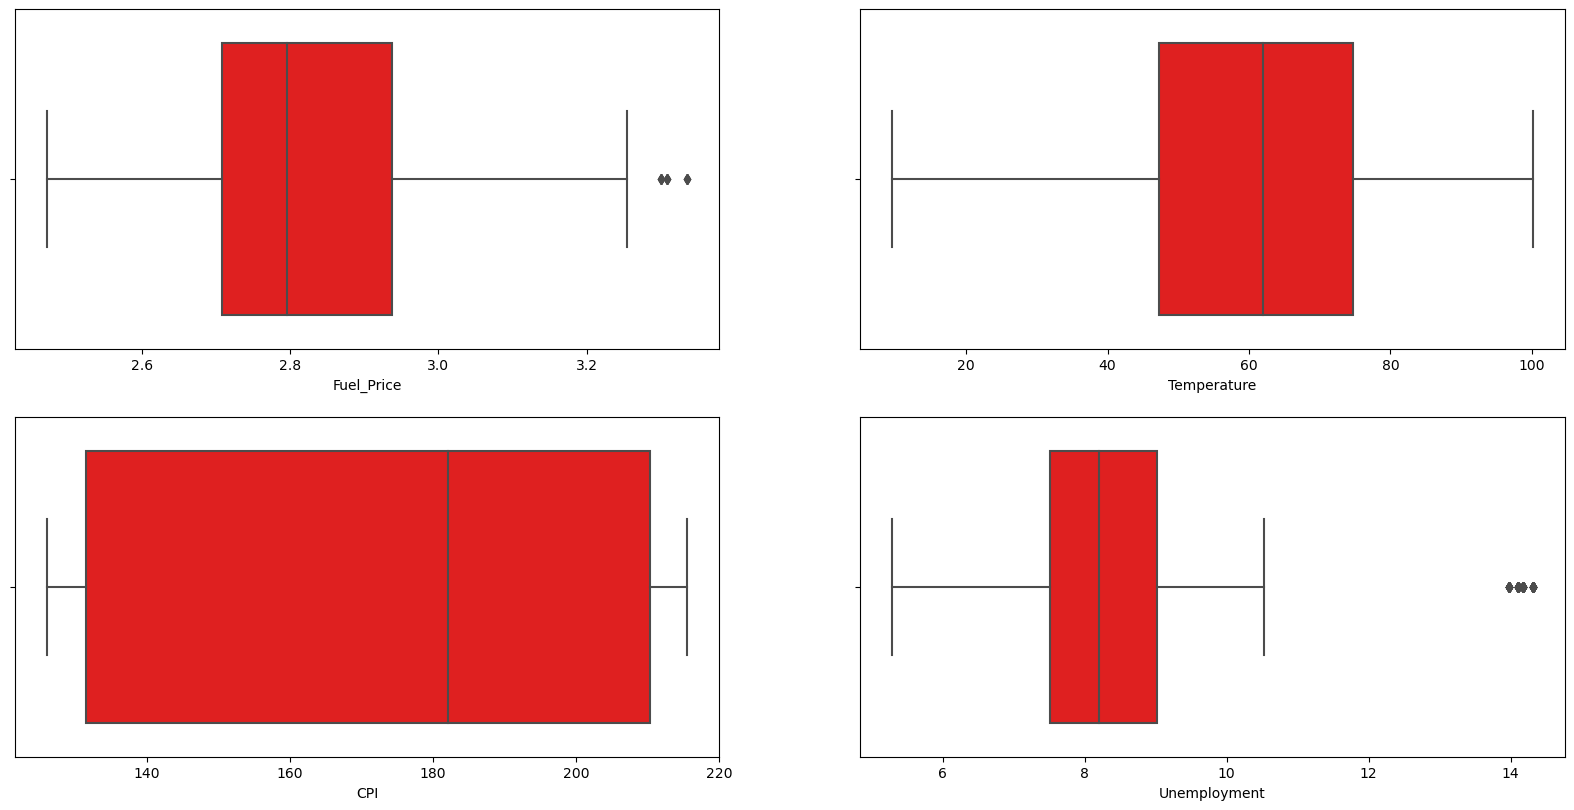

Number of data rows of 2010: 2160

Column: Fuel_Price
Number of outliers: 12

Column: Temperature
Number of outliers: 0

Column: CPI
Number of outliers: 0

Column: Unemployment
Number of outliers: 144



In [25]:
cols = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
plt.figure(figsize=(20,15))
outliers_info1 = {}  # Dictionary to store outliers info 1
for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = filtered_data_1[col], color='red')  # Assuming filtered_data_1 is your DataFrame
    # Get outliers of 2010
    q1 = filtered_data_1[col].quantile(0.25)
    q3 = filtered_data_1[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = (q1 - (1.5 * iqr))
    upper_bound = (q3 + (1.5 * iqr))
    outliers1 = filtered_data_1[(filtered_data_1[col] < lower_bound) | (filtered_data_1[col] > upper_bound)][col]
    outliers_info1[col] = {'outliers1': outliers1}
plt.show()

print('Number of data rows of 2010:', filtered_data_1.shape[0])
# Print outliers info 1
print("")
for col, info in outliers_info1.items():
    print(f"Column: {col}")
    print(f"Number of outliers: {info['outliers1'].shape[0]}")
    print("")

### Checking outliers of 2011 data by plotting boxplot

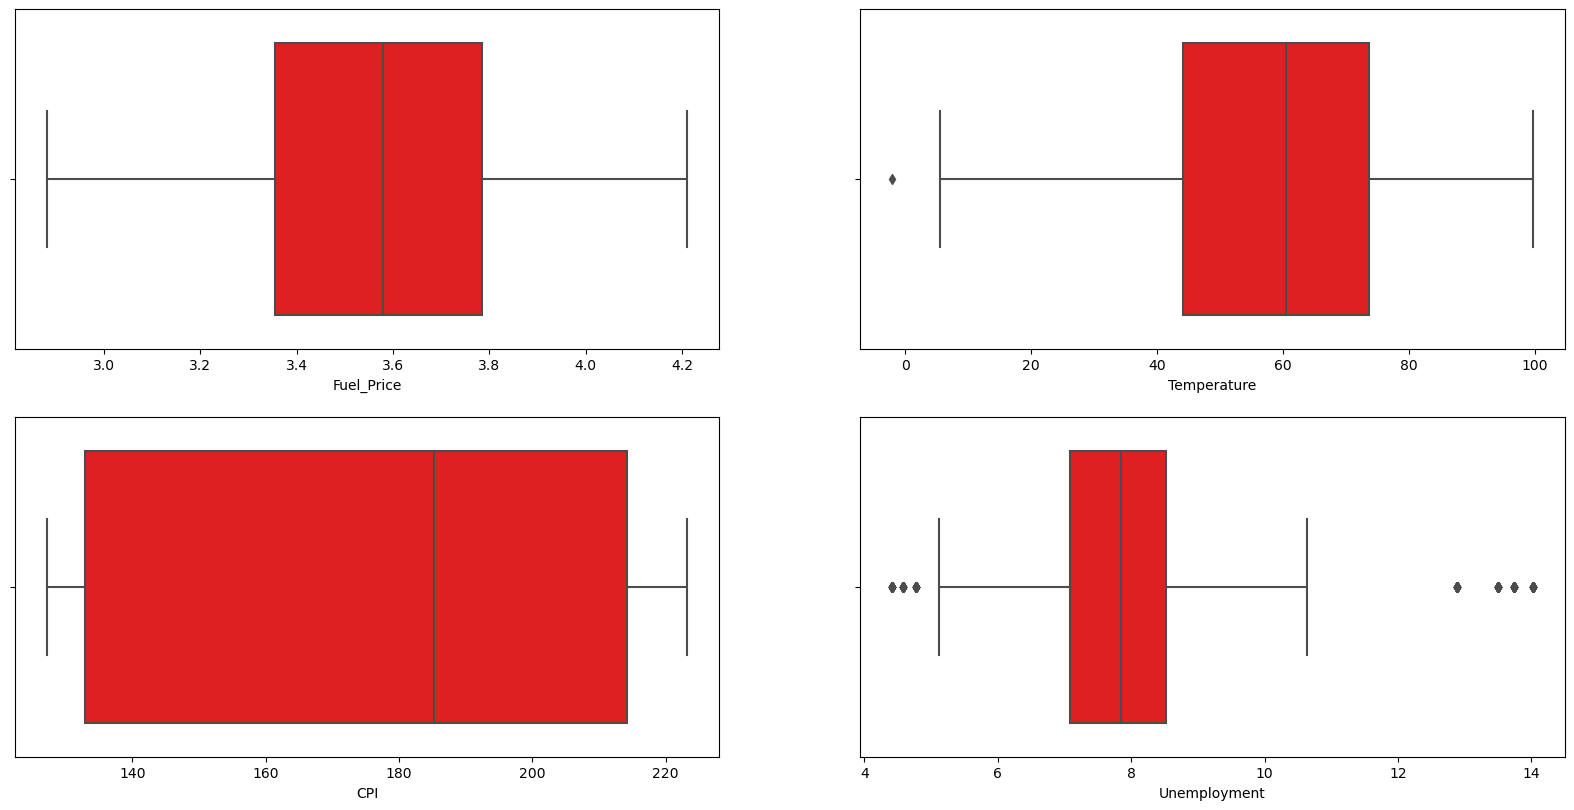

Number of data rows of 2011: 2340

Column: Fuel_Price
Number of outliers: 0

Column: Temperature
Number of outliers: 1

Column: CPI
Number of outliers: 0

Column: Unemployment
Number of outliers: 236



In [26]:
cols = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
plt.figure(figsize=(20,15))
outliers_info2 = {}  # Dictionary to store outliers info 2
for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = filtered_data_2[col], color='red')  # Assuming filtered_data_2 is your DataFrame
    # Get outliers of 2011
    q1 = filtered_data_2[col].quantile(0.25)
    q3 = filtered_data_2[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers2 = filtered_data_2[(filtered_data_2[col] < lower_bound) | (filtered_data_2[col] > upper_bound)][col]
    outliers_info2[col] = {'outliers2': outliers2}
plt.show()

print('Number of data rows of 2011:', filtered_data_2.shape[0])
# Print outliers info 2
print("")
for col, info in outliers_info2.items():
    print(f"Column: {col}")
    print(f"Number of outliers: {info['outliers2'].shape[0]}")
    print("")

## Checking outliers of 2012 data by plotting boxplot

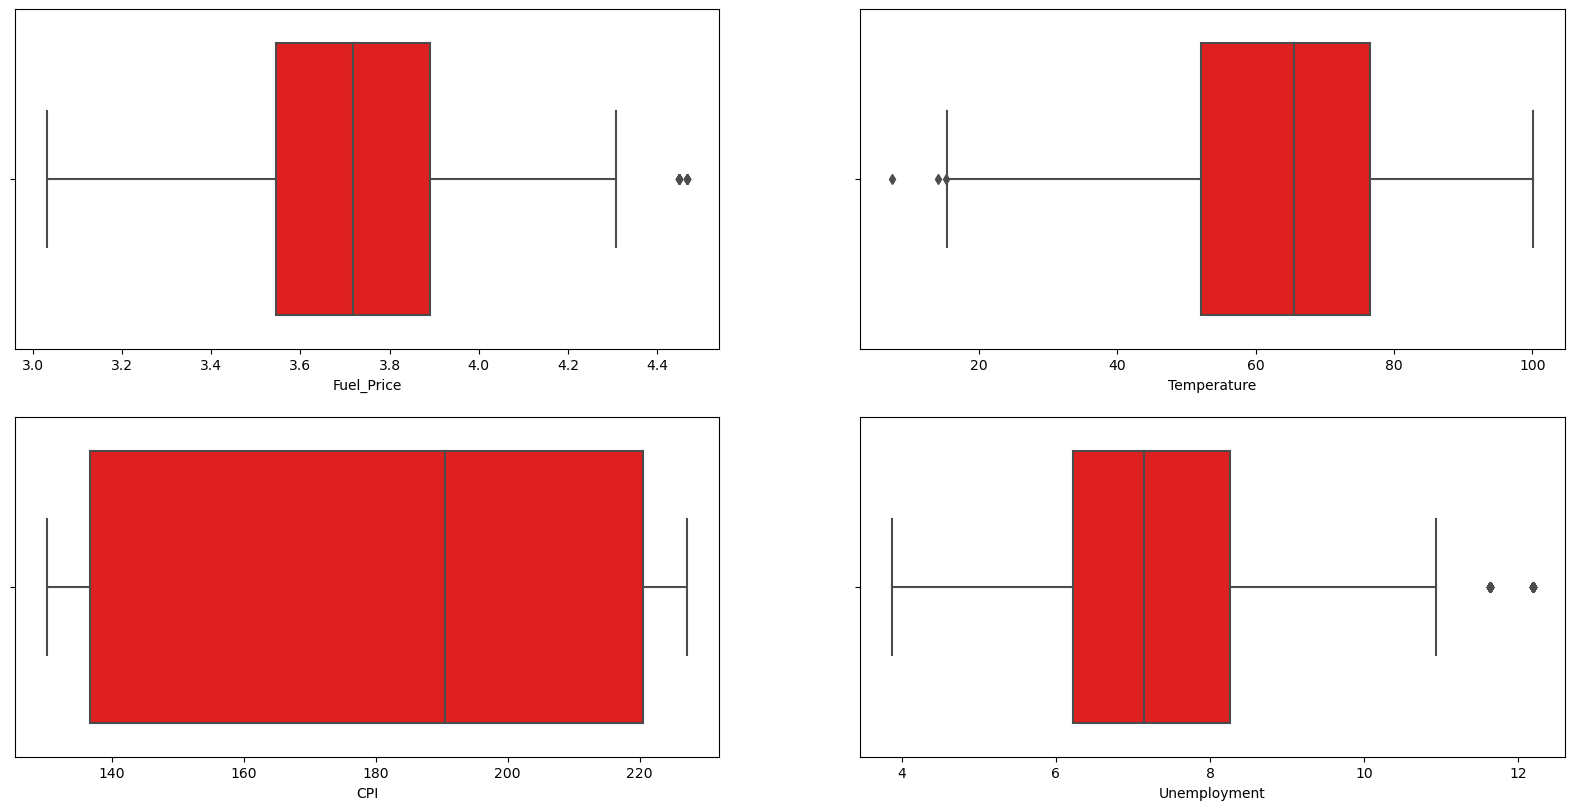

Number of data rows of 2012: 1935

Column: Fuel_Price
Number of outliers: 12

Column: Temperature
Number of outliers: 3

Column: CPI
Number of outliers: 0

Column: Unemployment
Number of outliers: 78



In [27]:
cols = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
plt.figure(figsize=(20,15))
outliers_info3 = {}  # Dictionary to store outliers info 3
for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = filtered_data_3[col], color='red')  # Assuming filtered_data_3 is your DataFrame
    # Get outliers of 2012
    q1 = filtered_data_3[col].quantile(0.25)
    q3 = filtered_data_3[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers3 = filtered_data_3[(filtered_data_3[col] < lower_bound) | (filtered_data_3[col] > upper_bound)][col]
    outliers_info3[col] = {'min': filtered_data_3[col].min(), 'max': filtered_data_3[col].max(), 'outliers3': outliers3}
plt.show()

print('Number of data rows of 2012:', filtered_data_3.shape[0])
# Print outliers info 3
print("")
for col, info in outliers_info3.items():
    print(f"Column: {col}")
    print(f"Number of outliers: {info['outliers3'].shape[0]}")
    print("")

### Checking outliers of 2010-2012 data by plotting boxplot

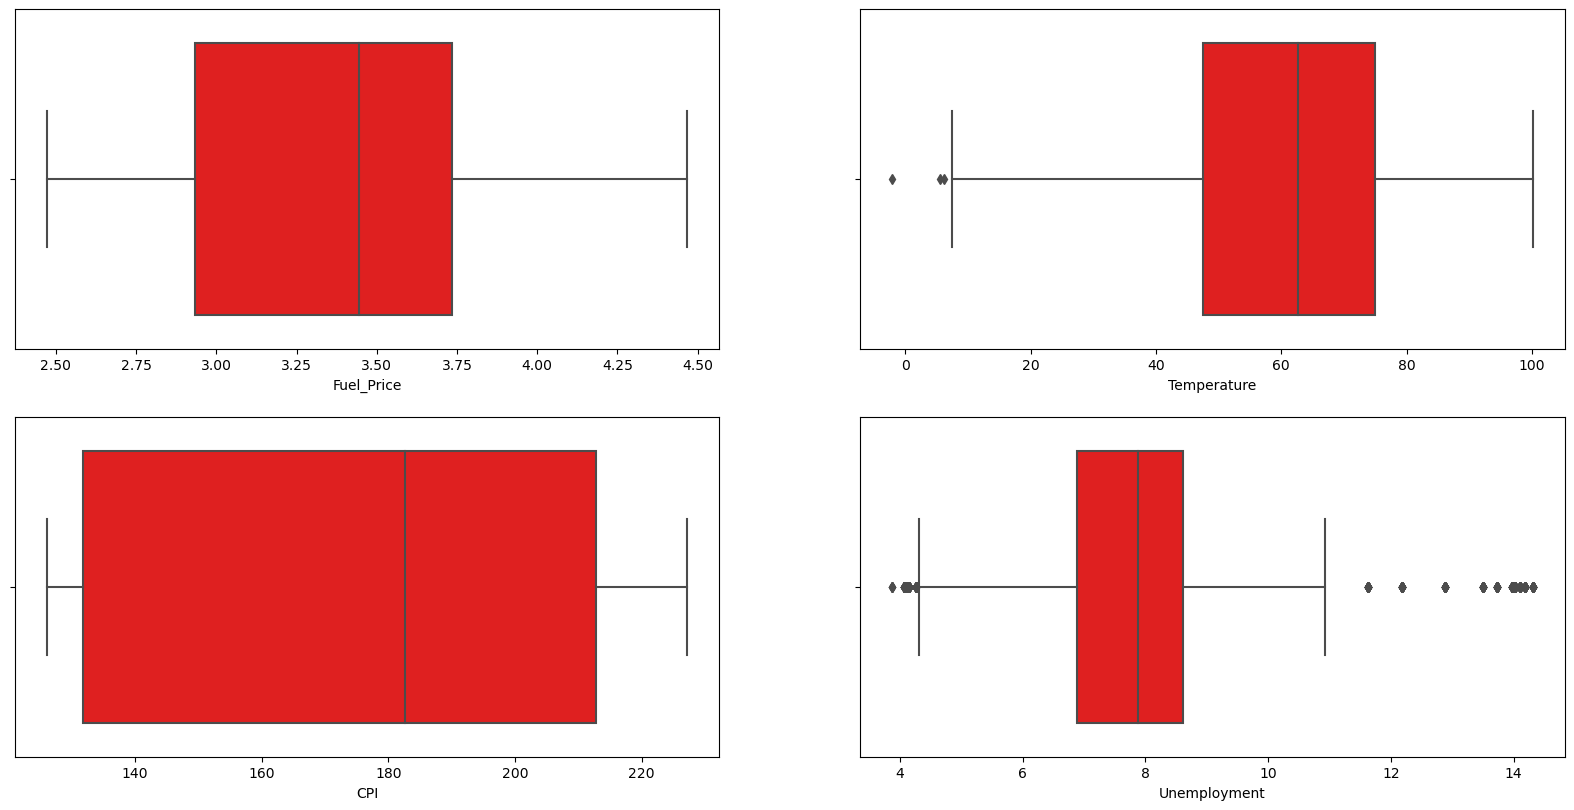

Number of data rows from 2010-2012: 6435

Column: Fuel_Price
Number of outliers: 0

Column: Temperature
Number of outliers: 3

Column: CPI
Number of outliers: 0

Column: Unemployment
Number of outliers: 481



In [28]:
cols = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
plt.figure(figsize=(20,15))
outliers_info4 = {}  # Dictionary to store outliers info 4
for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = full_data[col], color='red')  # Assuming full_data is your DataFrame
    # Get outliers from 2010 to 2012
    q1 = full_data[col].quantile(0.25)
    q3 = full_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers4 = full_data[(full_data[col] < lower_bound) | (full_data[col] > upper_bound)][col]
    outliers_info4[col] = {'min': full_data[col].min(), 'max': full_data[col].max(), 'outliers4': outliers4}
plt.show()

print('Number of data rows from 2010-2012:', full_data.shape[0])
# Print outliers info 4
print("")
for col, info in outliers_info4.items():
    print(f"Column: {col}")
    print(f"Number of outliers: {info['outliers4'].shape[0]}")
    print("")

### Removing outliers from 2010-2012 data

In [29]:
# Define features for outlier removal
features1 = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
features2 = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
features3 = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
features4 = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']

# Remove outliers using IQR method
for col1 in features1:
    # Calculate IQR more efficiently
    q1 = filtered_data_1[col1].quantile(0.25)
    q3 = filtered_data_1[col1].quantile(0.75)
    iqr1 = q3 - q1

    # Filter data within 1.5 IQR of quartiles
    filtered_data_1 = filtered_data_1[filtered_data_1[col1] <= (q3 + 1.5 * iqr1)]
    filtered_data_1 = filtered_data_1[filtered_data_1[col1] >= (q1 - 1.5 * iqr1)]

    # Reset index after each filtering
    filtered_data_1 = filtered_data_1.reset_index(drop=True)

for col2 in features2:
    # Calculate IQR more efficiently
    q1 = filtered_data_2[col2].quantile(0.25)
    q3 = filtered_data_2[col2].quantile(0.75)
    iqr2 = q3 - q1

    # Filter data within 1.5 IQR of quartiles
    filtered_data_2 = filtered_data_2[filtered_data_2[col2] <= (q3 + 1.5 * iqr2)]
    filtered_data_2 = filtered_data_2[filtered_data_2[col2] >= (q1 - 1.5 * iqr2)]

    # Reset index after each filtering
    filtered_data_2 = filtered_data_2.reset_index(drop=True)
    
for col3 in features3:
    # Calculate IQR more efficiently
    q1 = filtered_data_3[col3].quantile(0.25)
    q3 = filtered_data_3[col3].quantile(0.75)
    iqr3 = q3 - q1

    # Filter data within 1.5 IQR of quartiles
    filtered_data_3 = filtered_data_3[filtered_data_3[col3] <= (q3 + 1.5 * iqr3)]
    filtered_data_3 = filtered_data_3[filtered_data_3[col3] >= (q1 - 1.5 * iqr3)]

    # Reset index after each filtering
    filtered_data_3 = filtered_data_3.reset_index(drop=True)
    
for col4 in features4:
    # Calculate IQR more efficiently
    q1 = full_data[col4].quantile(0.25)
    q3 = full_data[col4].quantile(0.75)
    iqr4 = q3 - q1

    # Filter data within 1.5 IQR of quartiles
    full_data = full_data[full_data[col4] <= (q3 + 1.5 * iqr4)]
    full_data = full_data[full_data[col4] >= (q1 - 1.5 * iqr4)]

    # Reset index after each filtering
    full_data = full_data.reset_index(drop=True)

# Print informative messages about outlier removal
print("After outlier removal, filtered_data_1 has {} samples.".format(filtered_data_1.shape[0]))
print("After outlier removal, filtered_data_2 has {} samples.".format(filtered_data_2.shape[0]))
print("After outlier removal, filtered_data_3 has {} samples.".format(filtered_data_3.shape[0]))
print("After outlier removal, full_data has {} samples.".format(full_data.shape[0]))

After outlier removal, filtered_data_1 has 2004 samples.
After outlier removal, filtered_data_2 has 2103 samples.
After outlier removal, filtered_data_3 has 1843 samples.
After outlier removal, full_data has 5951 samples.


# Data Visualization

### Histogram of Distribution of Weekly Sales from 2010 to 2012

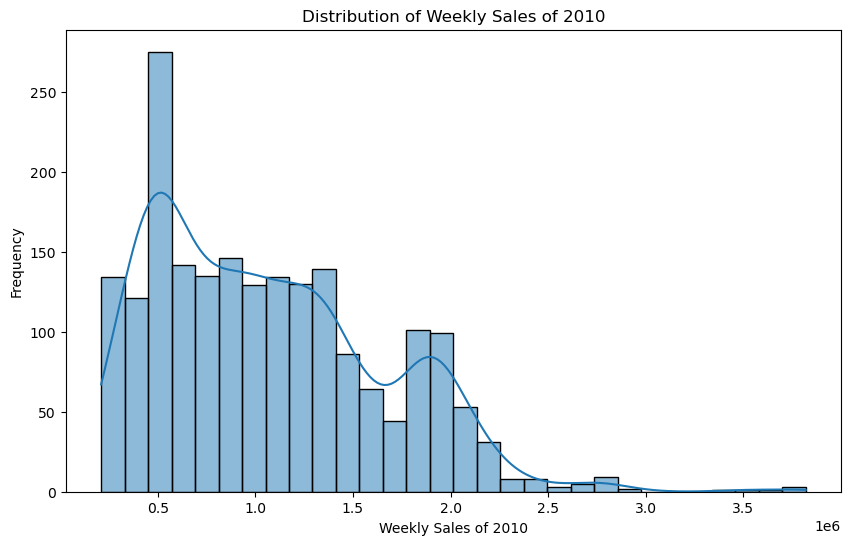

In [30]:
# Distribution of Weekly Sales of 2010
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data_1, x='Weekly_Sales', bins=30, kde=True)
plt.title('Distribution of Weekly Sales of 2010')
plt.xlabel('Weekly Sales of 2010')
plt.ylabel('Frequency')
plt.show()

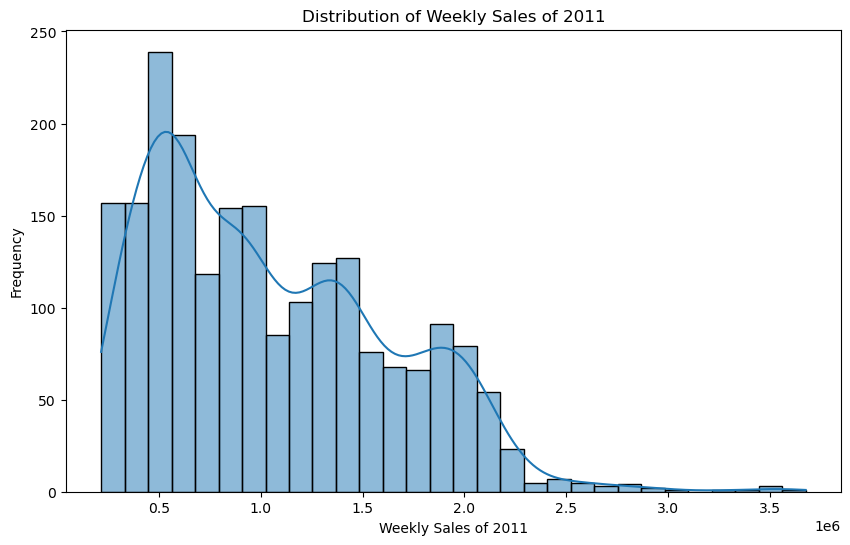

In [31]:
# Distribution of Weekly Sales of 2011
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data_2, x='Weekly_Sales', bins=30, kde=True)
plt.title('Distribution of Weekly Sales of 2011')
plt.xlabel('Weekly Sales of 2011')
plt.ylabel('Frequency')
plt.show()

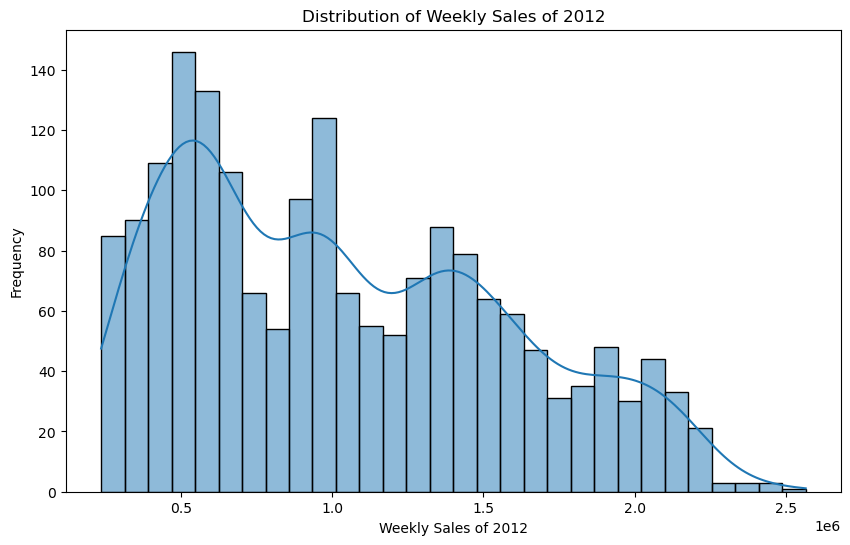

In [32]:
# Distribution of Weekly Sales of 2012
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data_3, x='Weekly_Sales', bins=30, kde=True)
plt.title('Distribution of Weekly Sales of 2012')
plt.xlabel('Weekly Sales of 2012')
plt.ylabel('Frequency')
plt.show()

### Barplot of Weekly Sales from 2010 to 2012 by Store

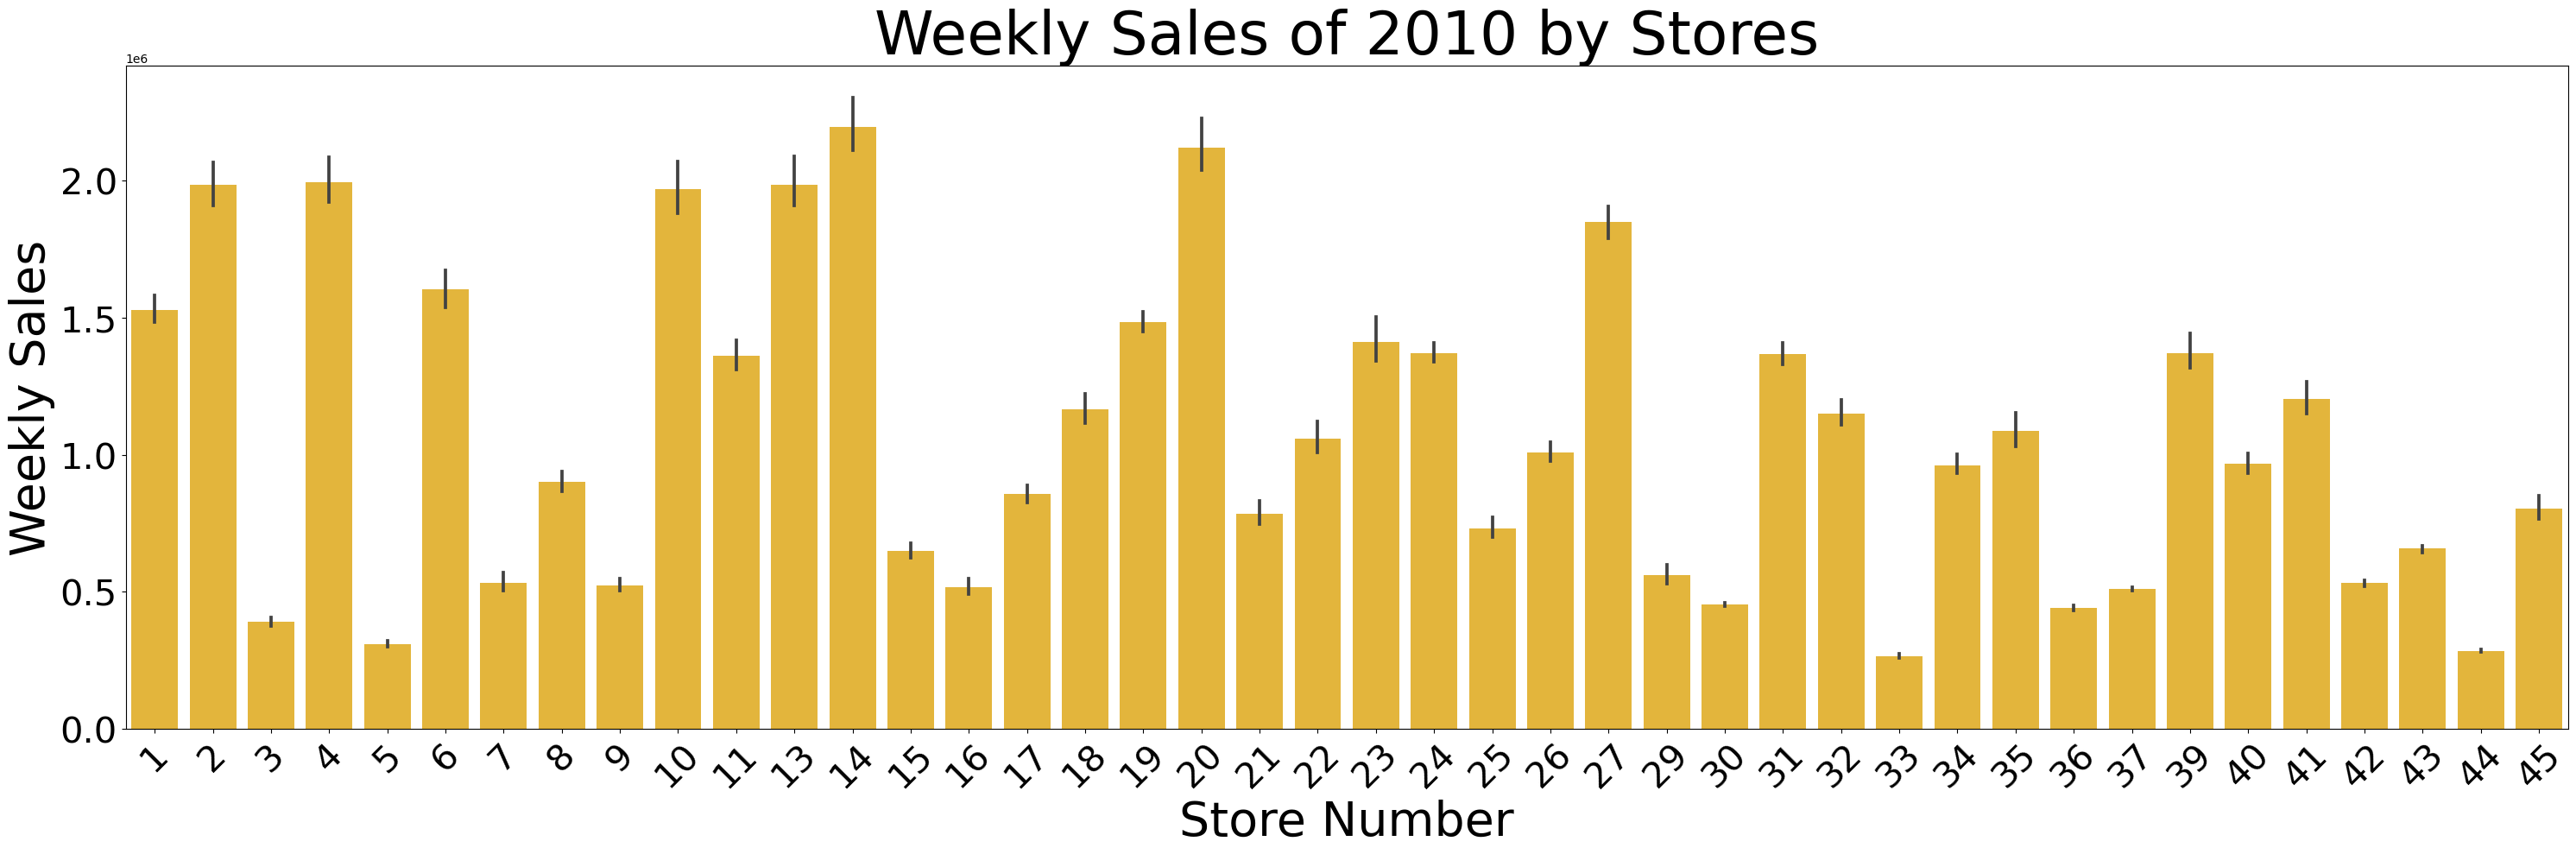

In [33]:
# Weekly Sales of 2010 by Store
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', color='#FFC220', data=filtered_data_1)

plt.xlabel('Store Number', fontsize=40)
plt.ylabel('Weekly Sales', fontsize=40)
plt.title('Weekly Sales of 2010 by Stores', fontsize=50)

plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()

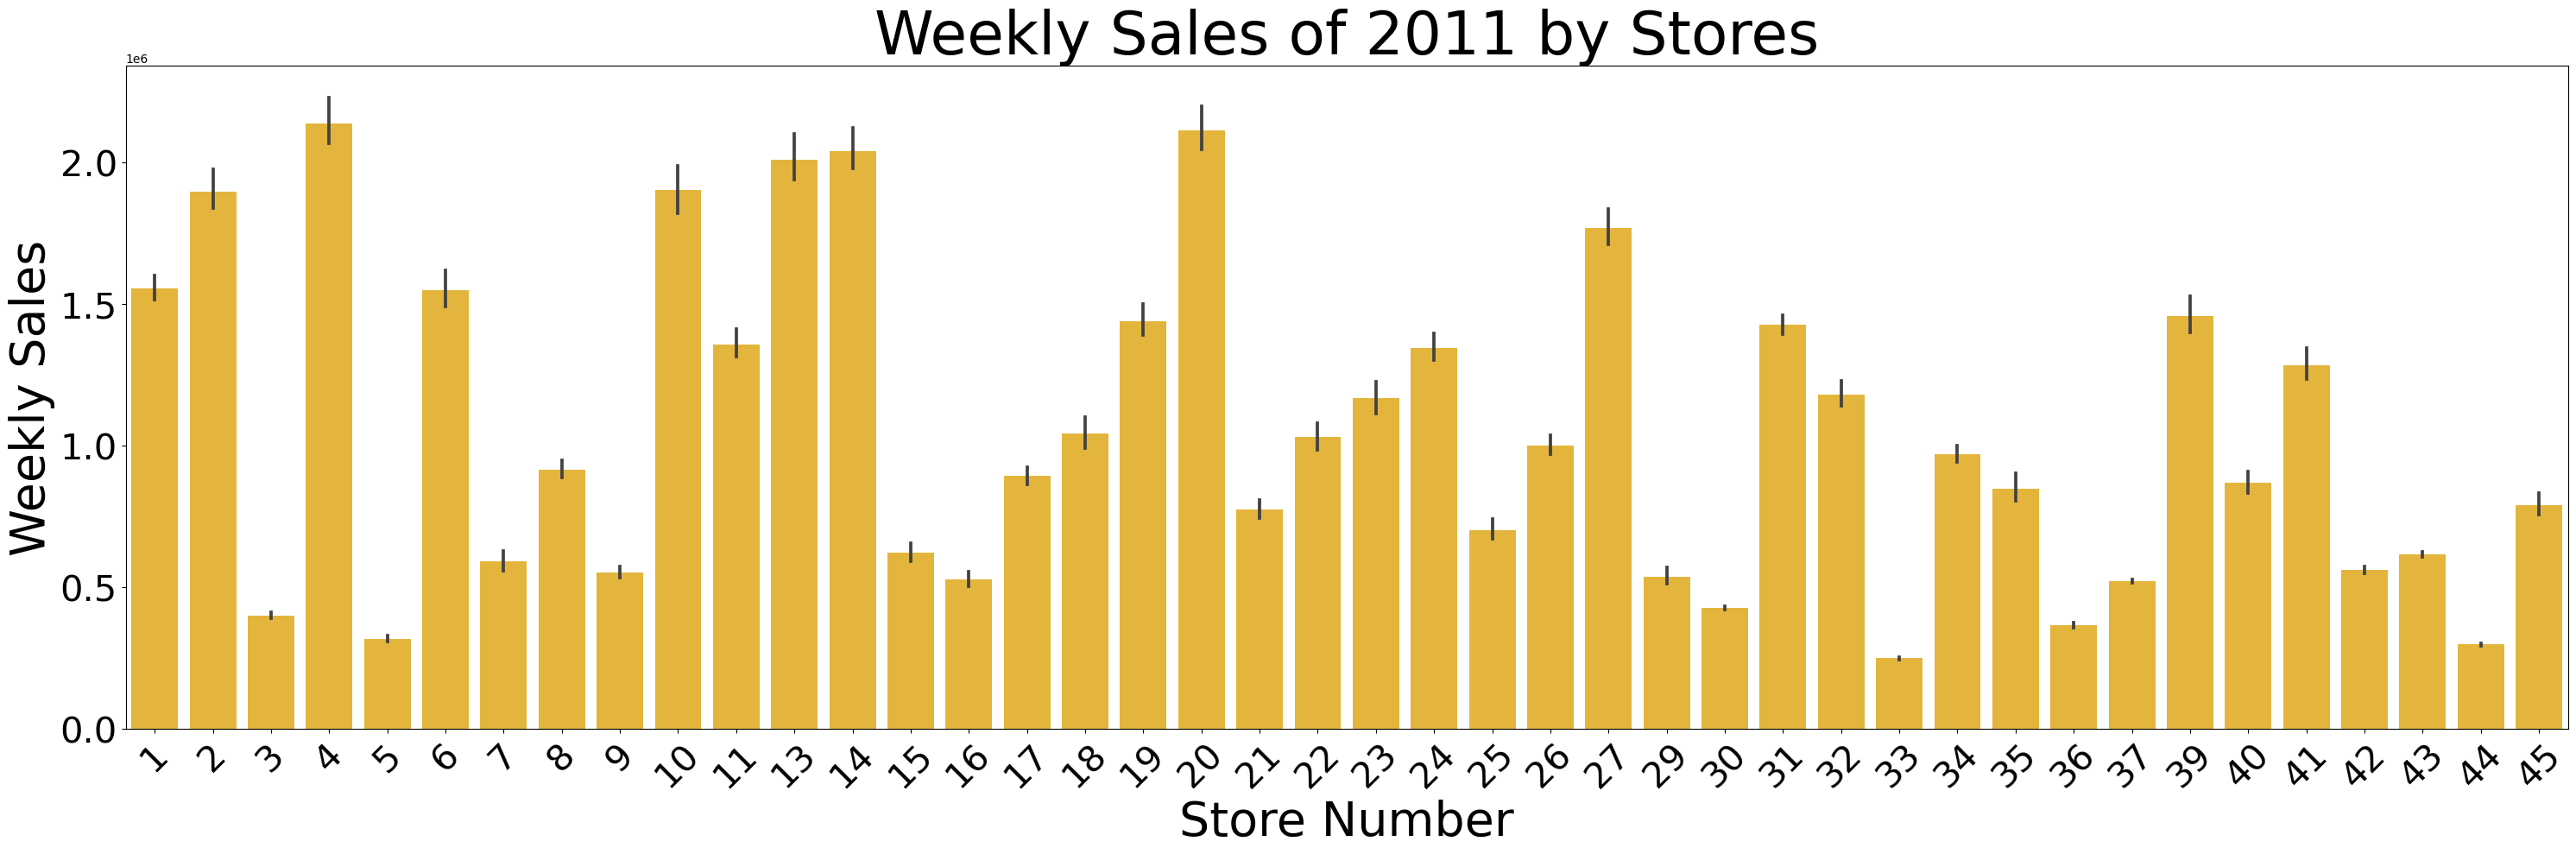

In [34]:
# Weekly Sales of 2011 by Store
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', color='#FFC220', data=filtered_data_2)

plt.xlabel('Store Number', fontsize=40)
plt.ylabel('Weekly Sales', fontsize=40)
plt.title('Weekly Sales of 2011 by Stores', fontsize=50)

plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()

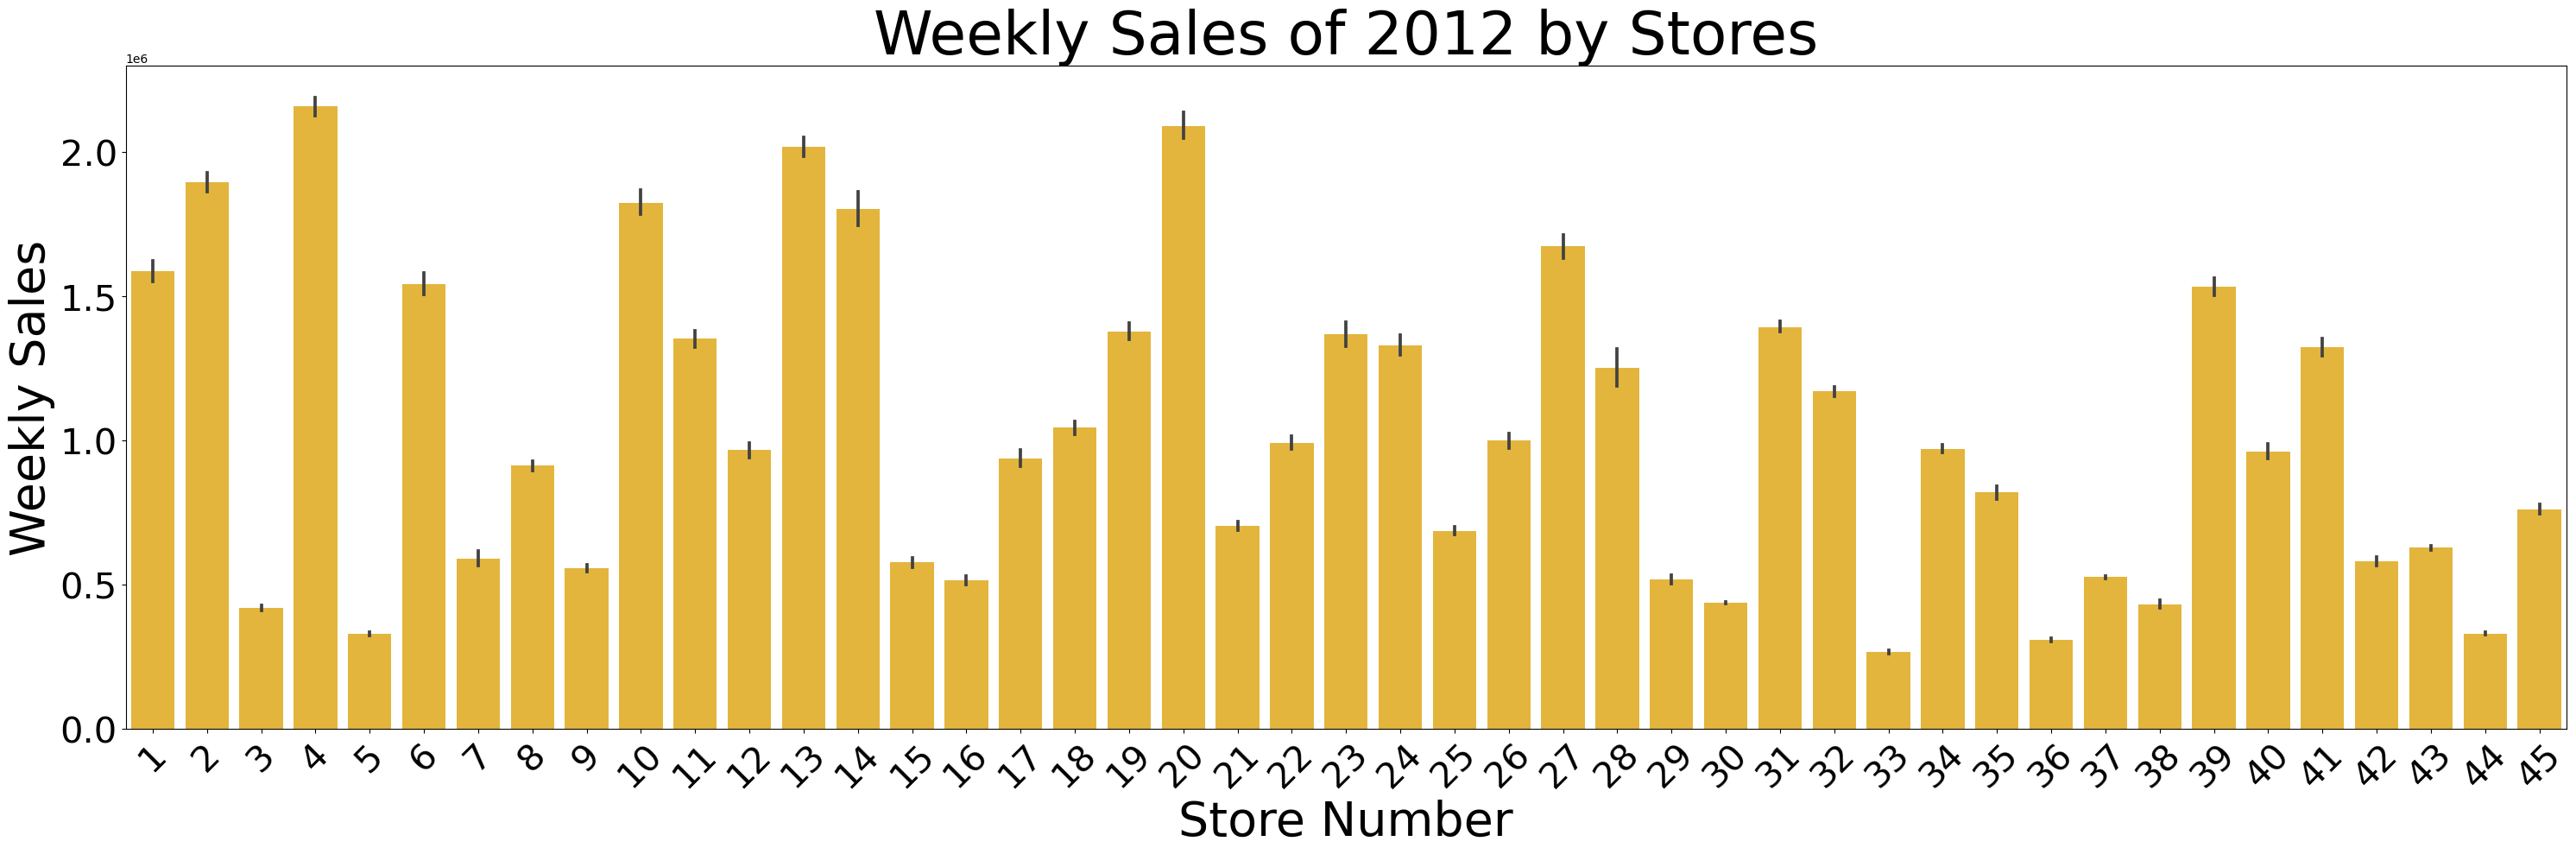

In [35]:
# Weekly Sales of 2012 by Store
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', color='#FFC220', data=filtered_data_3)

plt.xlabel('Store Number', fontsize=40)
plt.ylabel('Weekly Sales', fontsize=40,)
plt.title('Weekly Sales of 2012 by Stores', fontsize=50)

plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()

### Barplot of Weekly Sales by Year

C:\Users\moham\AppData\Local\Temp\ipykernel_14952\493358986.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = full_data,x = 'Year', y = 'Weekly_Sales', estimator = np.sum, ci = False)


<Axes: title={'center': 'Weekly Sales by Year'}, xlabel='Year', ylabel='Weekly_Sales'>

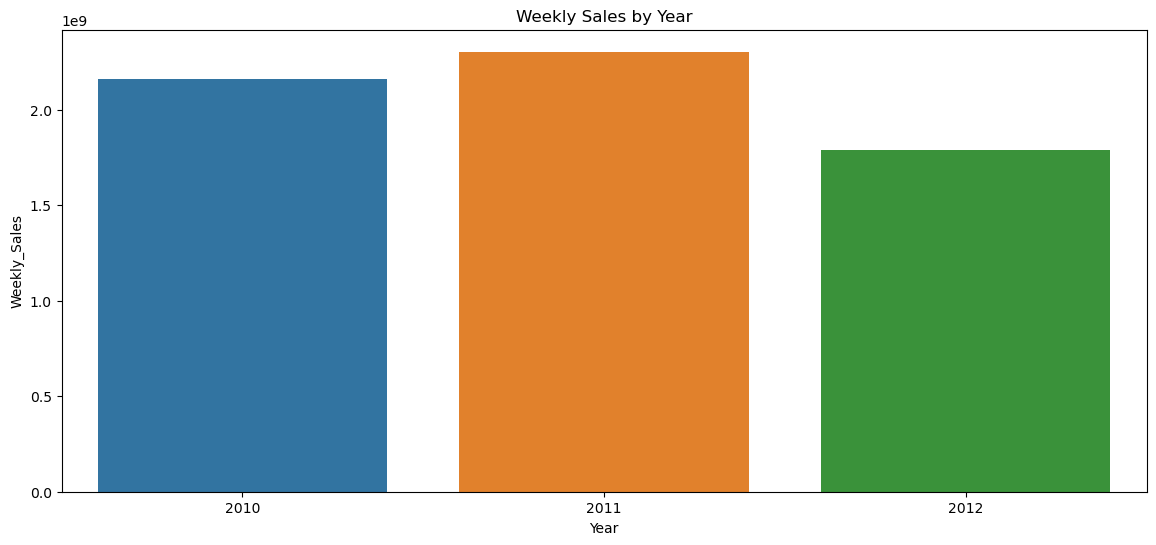

In [36]:
# Weekly Sales by Year
plt.figure(figsize = (14, 6))
plt.title('Weekly Sales by Year')
sns.barplot(data = full_data,x = 'Year', y = 'Weekly_Sales', estimator = np.sum, ci = False)

### Barplot of Total Sales for each Month in each Year

C:\Users\moham\AppData\Local\Temp\ipykernel_14952\4082629735.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = full_data, x = 'Year', y = 'Weekly_Sales', hue = 'Month', estimator = np.sum, ci = False)


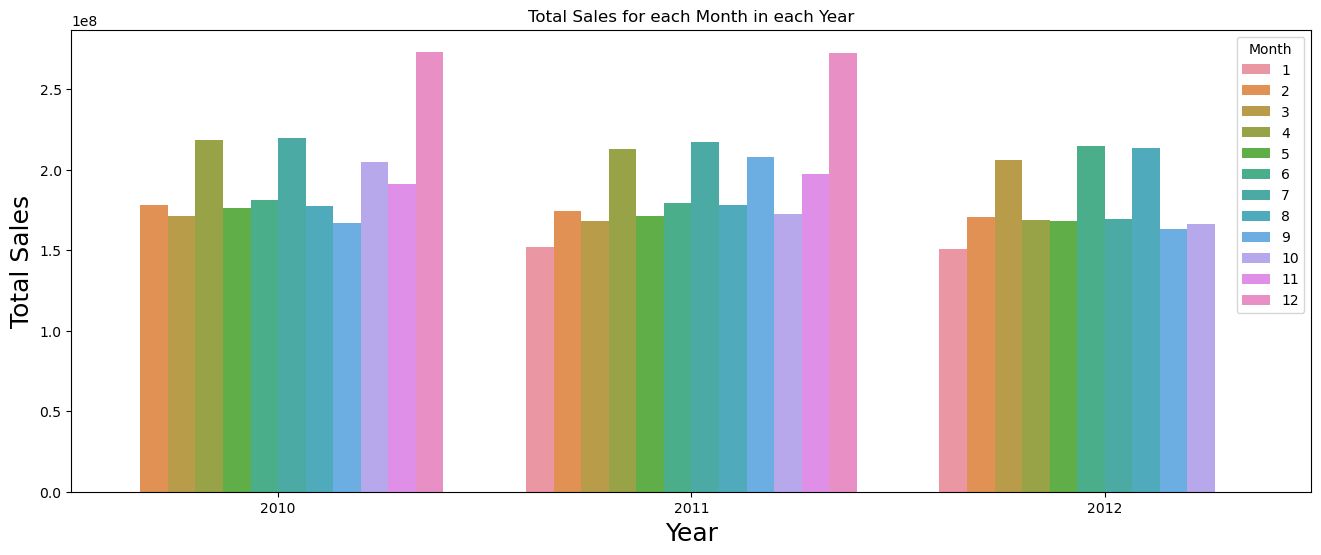

In [37]:
plt.figure(figsize = (16, 6))
sns.barplot(data = full_data, x = 'Year', y = 'Weekly_Sales', hue = 'Month', estimator = np.sum, ci = False)

# Add labels and title
plt.title('Total Sales for each Month in each Year')
plt.xlabel('Year', size = 18)
plt.ylabel('Total Sales', size = 18)

plt.show()

### Barplot of Weekly Sales from 2010 to 2012 by Month

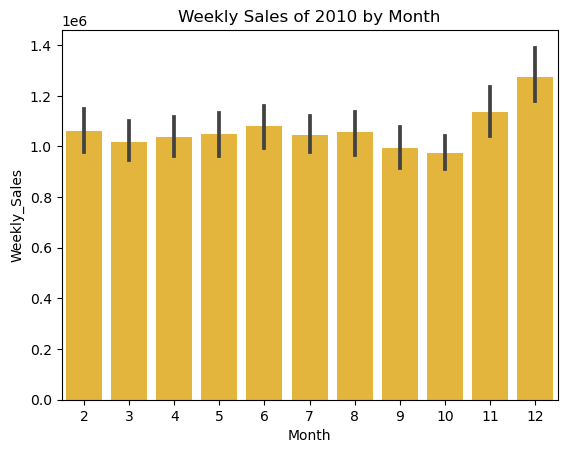

In [38]:
# Weekly Sales of 2010 by Month
plt.title('Weekly Sales of 2010 by Month')
fig = sns.barplot(x='Month', y='Weekly_Sales',  color='#FFC220',data=filtered_data_1)

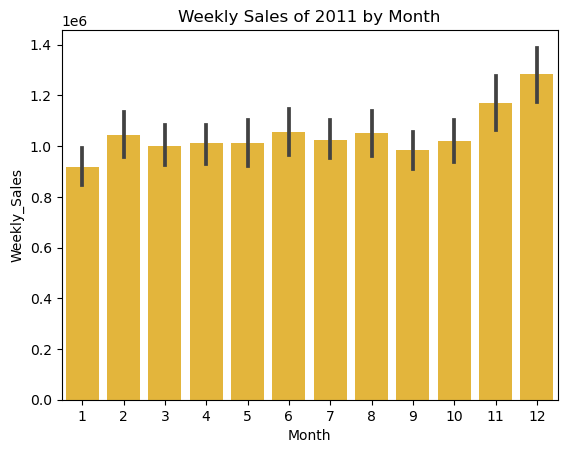

In [39]:
# Weekly Sales of 2011 by Month
plt.title('Weekly Sales of 2011 by Month')
fig = sns.barplot(x='Month', y='Weekly_Sales',  color='#FFC220',data=filtered_data_2)

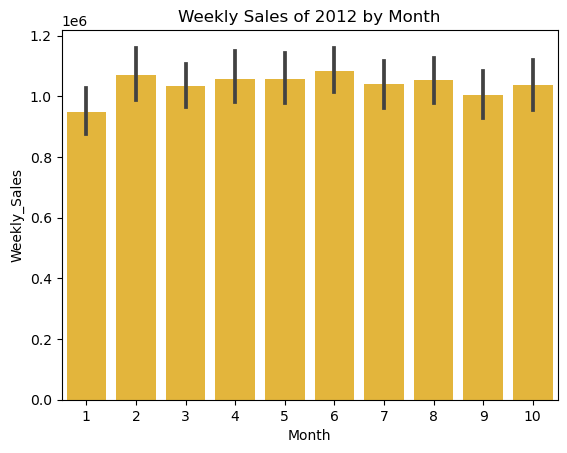

In [40]:
# Weekly Sales of 2012 by Month
plt.title('Weekly Sales of 2012 by Month')
fig = sns.barplot(x='Month', y='Weekly_Sales',  color='#FFC220',data=filtered_data_3)

### Barplot of Visualizing Sales on Holidays vs Non-Holidays

<Axes: title={'center': 'Visualizing sales on holidays vs non-holidays'}, xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

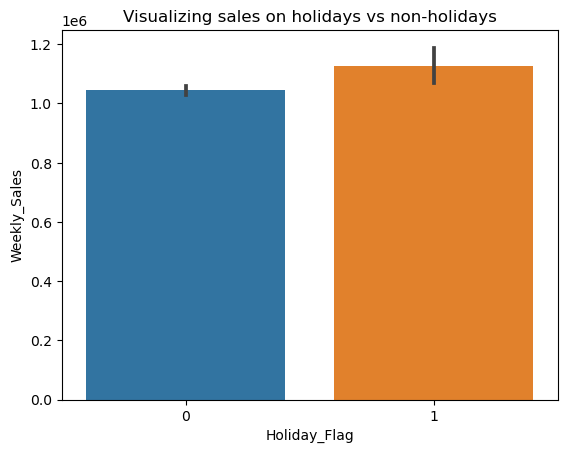

In [41]:
# Visualizing sales on holidays vs non-holidays
plt.title('Visualizing sales on holidays vs non-holidays')
sns.barplot(data=full_data,x=full_data["Holiday_Flag"],y=full_data["Weekly_Sales"])

### Time Series Plot of Weekly Sales Over Time from 2010 to 2012

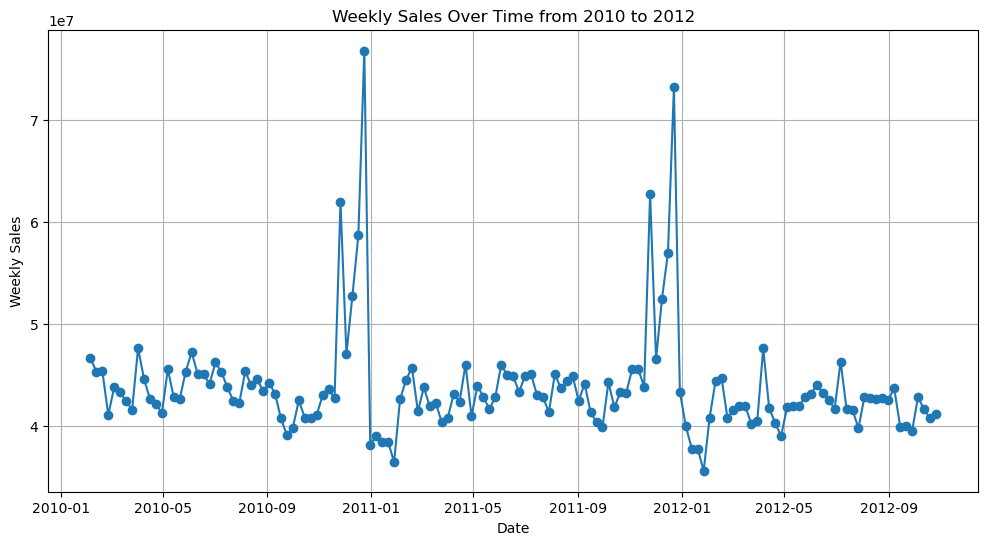

In [42]:
# Convert the date columns to datetime format
full_data['Date'] = pd.to_datetime(full_data[['Year', 'Month', 'Day']])

# Group by date and calculate total weekly sales
weekly_sales = full_data.groupby('Date')['Weekly_Sales'].sum()

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-')
plt.title('Weekly Sales Over Time from 2010 to 2012')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

### Correlation Heatmap of Numerical Features

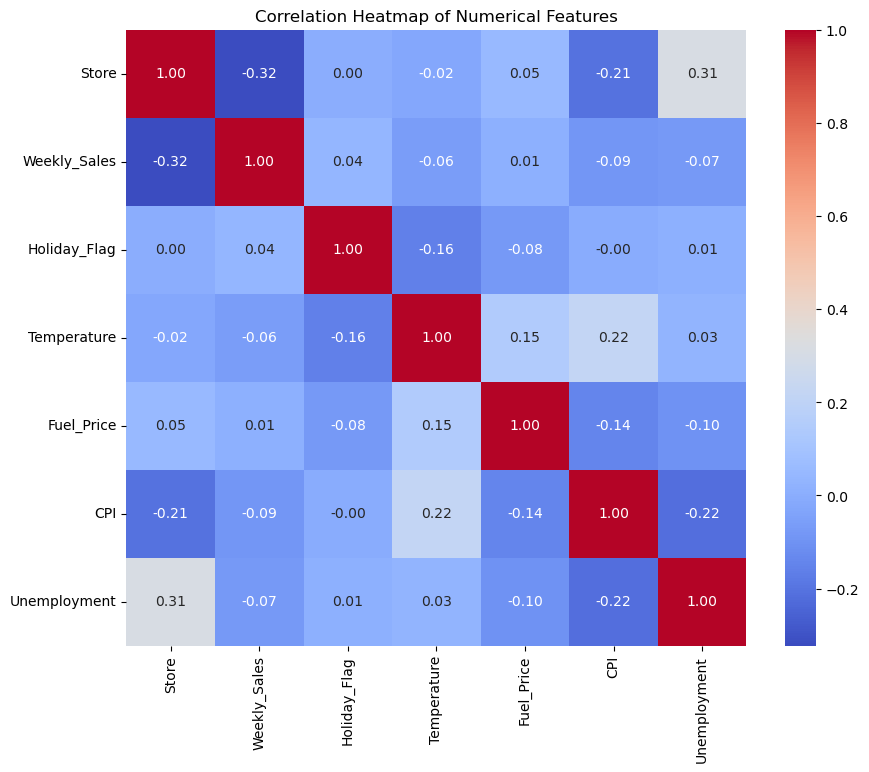

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(full_data[['Store','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Model Training and Evaluation

## Linear Regression, Ridge Linear Regression, K-Neighbors Regressor, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor & XGBoost Regression Model Training and Evaluation

In [44]:
# X and y are the input and target variables
X = full_data[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = full_data['Weekly_Sales']

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Multiple Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)

# Train a Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_reg_pred = ridge_reg.predict(X_test)

# Train a K-Neighbors Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_reg_pred = knn_reg.predict(X_test)

# Train a Decision Tree Regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_reg_pred = tree_reg.predict(X_test)

# Train a Random Forest Regressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_reg_pred = forest_reg.predict(X_test)

# Train a Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
gb_reg_pred = gb_reg.predict(X_test)

# Train an XGBoost Regressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg_pred = xgb_reg.predict(X_test)

# Calculate metrics for each model
models = {
    'Linear Regression': linear_reg_pred,
    'Ridge Linear Regression': ridge_reg_pred,
    'K-Neighbors Regressor': knn_reg_pred,
    'Decision Tree Regressor': tree_reg_pred,
    'Random Forest Regressor': forest_reg_pred,
    'Gradient Boosting Regressor': gb_reg_pred,
    'XGBoost Regression Model': xgb_reg_pred
}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mse, mae

for name, predictions in models.items():
    rmse, mse, mae = calculate_metrics(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Model Evaluation Metrics for {name}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R^2: {r2:.4f}")
    print("---------------------")

Model Evaluation Metrics for Linear Regression:
RMSE: 541702.0567
MSE: 293441118185.1482
MAE: 442857.9676
R^2: 0.1351
---------------------
Model Evaluation Metrics for Ridge Linear Regression:
RMSE: 541699.4070
MSE: 293438247556.2043
MAE: 442855.2230
R^2: 0.1351
---------------------
Model Evaluation Metrics for K-Neighbors Regressor:
RMSE: 327586.9644
MSE: 107313219240.4191
MAE: 214334.0374
R^2: 0.6837
---------------------
Model Evaluation Metrics for Decision Tree Regressor:
RMSE: 201882.8037
MSE: 40756666419.0070
MAE: 103426.0158
R^2: 0.8799
---------------------
Model Evaluation Metrics for Random Forest Regressor:
RMSE: 155308.8086
MSE: 24120826037.6364
MAE: 79579.0887
R^2: 0.9289
---------------------
Model Evaluation Metrics for Gradient Boosting Regressor:
RMSE: 207739.8111
MSE: 43155829100.2949
MAE: 138049.6213
R^2: 0.8728
---------------------
Model Evaluation Metrics for XGBoost Regression Model:
RMSE: 137413.6259
MSE: 18882504581.6548
MAE: 74459.6312
R^2: 0.9443
---------

## LSTM Model Training and Evaluation with Different Configurations

In [45]:
# Define function to create and evaluate LSTM model
def evaluate_lstm_model(X_train, X_test, y_train, y_test, units_lstm1, units_lstm2, dropout_rate, epochs, batch_size):
    model = Sequential()
    model.add(LSTM(units_lstm1, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units_lstm2))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return rmse, mse, mae

# Different configurations to evaluate
configurations = [
    {"units_lstm1": 100, "units_lstm2": 50, "dropout_rate": 0.2, "epochs": 100, "batch_size": 64},
    {"units_lstm1": 150, "units_lstm2": 100, "dropout_rate": 0.3, "epochs": 150, "batch_size": 128},
    {"units_lstm1": 80, "units_lstm2": 40, "dropout_rate": 0.1, "epochs": 80, "batch_size": 32}
]

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Reshape input data to be 3D for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Evaluate different configurations
for config in configurations:
    rmse, mse, mae = evaluate_lstm_model(X_train, X_test, y_train, y_test, **config)
    print("Configuration:")
    print(f"Units LSTM 1: {config['units_lstm1']}")
    print(f"Units LSTM 2: {config['units_lstm2']}")
    print(f"Dropout Rate: {config['dropout_rate']}")
    print(f"Epochs: {config['epochs']}")
    print(f"Batch Size: {config['batch_size']}")
    print("\nLSTM Model Evaluation Metrics:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print("\n")

C:\Users\moham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Configuration:
Units LSTM 1: 100
Units LSTM 2: 50
Dropout Rate: 0.2
Epochs: 100
Batch Size: 64

LSTM Model Evaluation Metrics:
RMSE: 1195917.3729
MSE: 1430218362836.4238
MAE: 1044485.2254




C:\Users\moham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Configuration:
Units LSTM 1: 150
Units LSTM 2: 100
Dropout Rate: 0.3
Epochs: 150
Batch Size: 128

LSTM Model Evaluation Metrics:
RMSE: 1195803.1479
MSE: 1429945168490.4836
MAE: 1044354.4377




C:\Users\moham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Configuration:
Units LSTM 1: 80
Units LSTM 2: 40
Dropout Rate: 0.1
Epochs: 80
Batch Size: 32

LSTM Model Evaluation Metrics:
RMSE: 1195857.3413
MSE: 1430074780809.8975
MAE: 1044416.4898




## LSTM Time Series Forecasting with Keras

In [46]:
# Prepare the data
scaled_data = scaler.fit_transform(full_data['Weekly_Sales'].values.reshape(-1,1))

# Function to create sequences from data with a specified sequence length
def create_sequences(data, seq_length):
    X, y = [], [] # Initialize empty lists to store input sequences (X) and corresponding output values (y)
    for i in range(len(data) - seq_length): # Iterate over the data up to the length of the data minus the sequence length
        X.append(data[i:i+seq_length]) # Append a sequence of length seq_length to X, starting from index i
        y.append(data[i+seq_length]) # Append the value immediately following the sequence to y
    return np.array(X), np.array(y) # Convert lists to numpy arrays and return

# Define the sequence length
sequence_length = 10 

# Call create_sequences function with scaled_data and sequence_length, storing the results in X and y
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
predicted_values = model.predict(X_test)

# Inverse scaling
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test)

C:\Users\moham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.0205 - val_loss: 0.0018
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 9/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 10/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 11/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 12/50
130/130 ━━━━━━━━━━━━━━━━━━━━

## Visualization of Actual vs Predicted Weekly Sales

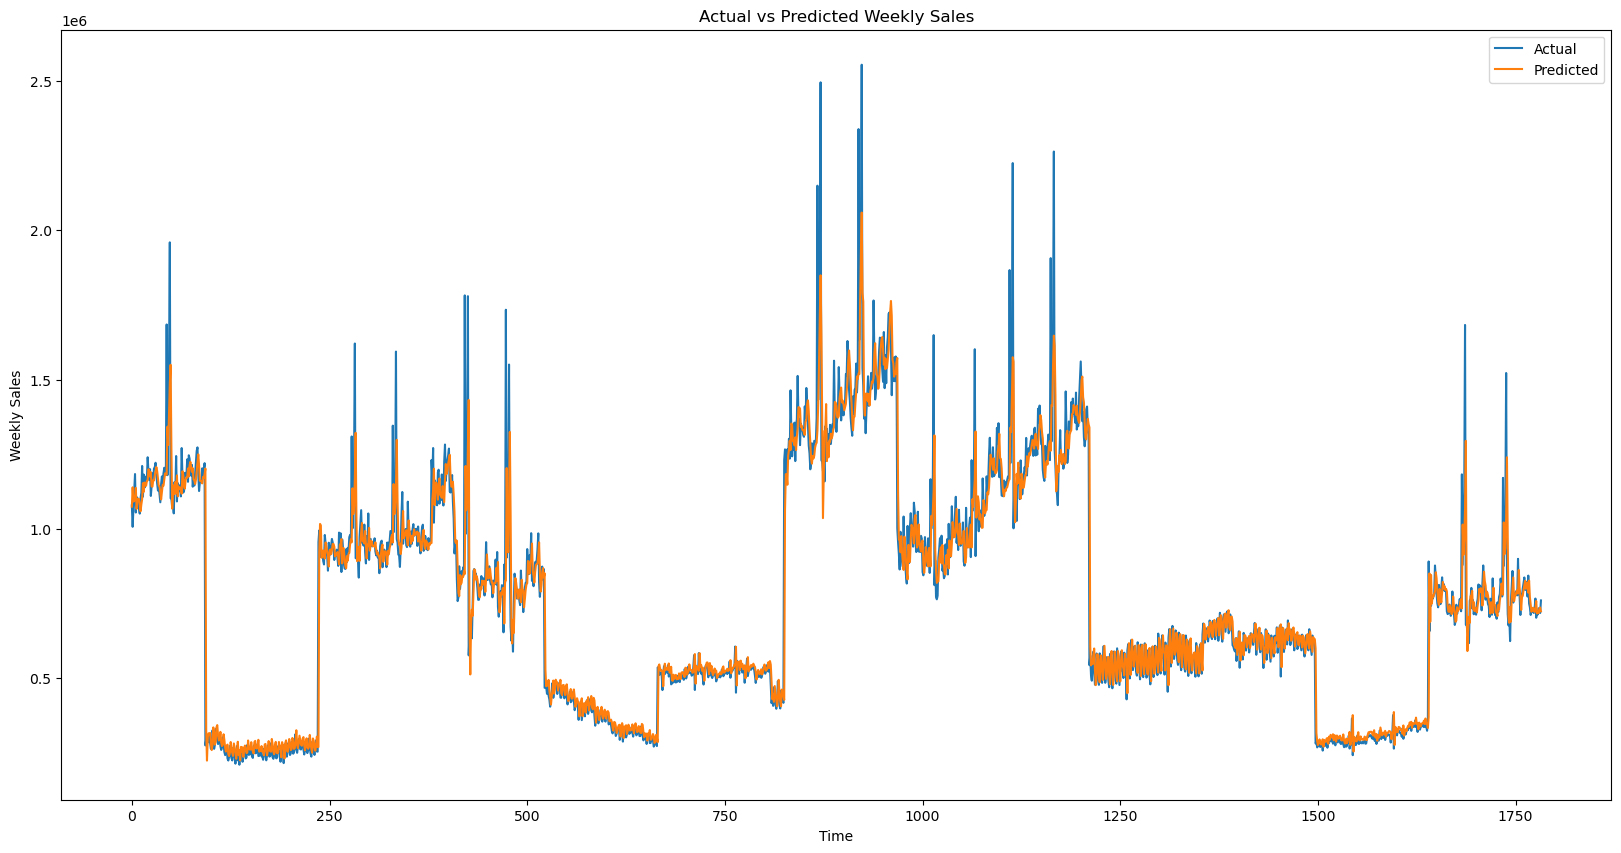

In [53]:
plt.figure(figsize=(20, 10)) # Set the figure size to 20,10

# Visualize predictions
plt.plot(y_test, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.legend()
plt.show()